## Focus sur la fréquentation des stations voyageurs

Ce jeu de données (`Fréquentation en gares`) représente la fréquentation annuelle de l'ensemble des 3000 gares voyageurs de 2015 à 2021.

Ces informations sont issues d’une part, des données de billetterie pour le trafic national et régional hors Ile-de-France et d’autre part, d’une extrapolation pour le trafic régional Ile-de-France à partir des comptages effectués tous les 3 à 4 ans et publiés par ailleurs en Open Data.

A noter, pour les années 2020 et 2021 peu de comptages ont été réalisés pour le trafic régional Ile-de-France en raison de la crise sanitaire. La fréquentation a été calculée en relatif par rapport aux évolutions des validations en gare observées depuis 2019.


Une estimation de la proportion de non voyageurs est réalisée à partir des enquêtes en gare. En l'absence d’enquête, un taux par défaut est défini (20% pour les gares a et b hors Ile-de-France et 0% pour les gares b Ile-de-France et c).


La méthodologie de calcul se précise année après année avec une reprise de l'historique pouvant expliquer des variations dans les données publiées d'une année sur l'autre. Pour toute question, vous pouvez nous l'adresser au travers du formulaire de contact du portail Open Data.

***Informations du site open data de la [SNCF](https://ressources.data.sncf.com/explore/dataset/frequentation-gares/information/?disjunctive.nom_gare&disjunctive.code_postal&sort=nom_gare)***

### Récupération des données de fréquentation des gares

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt
import requests as rq
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
url_Freq = "https://ressources.data.sncf.com/api/v2/catalog/datasets/frequentation-gares/exports/json?limit=-1&offset=0&lang=fr&timezone=Europe%2FParis"
dataFreq = rq.get(url_Freq)
dataFreq = dataFreq.json() 
dataFreq = pd.json_normalize(dataFreq)


In [7]:
dataFreq.shape
dataFreq.head()
dataFreq.tail()

(2970, 18)

,nom_gare,code_uic_complet,code_postal,segmentation_drg,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,totalvoyageurs2017,total_voyageurs_non_voyageurs_2017,total_voyageurs_2016,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015
0,Ablon-sur-Seine,87545269,94480,b,1594567,1594567,660309,660309,1457253,1457253,1462108,1462108,1471462,1471462,1453063,1453063,1427319,1427319
1,Achères Grand Cormier,87386052,78100,b,209673,209673,126513,126513,221003,221003,228032,228032,235698,235698,238687,238687,241046,241046
2,Agen,87586008,47000,a,1184007,1480009,860964,1076205,1211323,1514154,1109199,1386499,1194455,1493068,1141620,1427026,1183150,1478938
3,Agonac,87595157,24460,c,4119,4119,3271,3271,2538,2538,1492,1492,1583,1583,1134,1134,1127,1127
4,Aigrefeuille le Thou,87485193,17290,c,32989,32989,24987,24987,31170,31170,18670,18670,14513,14513,266,266,0,0


,nom_gare,code_uic_complet,code_postal,segmentation_drg,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,totalvoyageurs2017,total_voyageurs_non_voyageurs_2017,total_voyageurs_2016,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015
2965,Étalans,87718536,25580,c,50499,50499,48741,48741,48324,48324,43353,43353,48453,48453,47593,47593,45347,45347
2966,Étaples - Le Touquet,87317065,62630,b,396110,425925,268566,288781,388912,418185,354757,381459,377338,405740,358759,385762,389755,419092
2967,Étriché - Châteauneuf,87484154,49330,c,25656,25656,20760,20760,50986,50986,61562,61562,57633,57633,55988,55988,57751,57751
2968,Évreux Normandie,87387001,27000,a,787499,984374,693195,866494,1129373,1411717,1089292,1361615,1162631,1453288,1107913,1384892,1139477,1424346
2969,Évron,87478552,53600,b,120082,150103,93350,116687,162097,202621,181310,226638,192127,240159,187563,234454,181167,226459


Comme on peut le voir, les totaux de nombre de voyageurs et le total combiné  "**voyageurs**_**non-voyageurs**" sont fournis de 2015 à 2021, soit sur les sept (07) dernière années.

Dans le jeu de données , 
* **total_voyageurs** représsente le nombre total de personnes ayant validé leur passe dans la gare durant l'année ;
* **total_voyageurs_non_voyageurs** représente le nombre total de personnes ayant fréquenté la gare durant l'année.

 ### Examination du jeu de données

In [8]:
dataFreq.describe()

,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,totalvoyageurs2017,total_voyageurs_non_voyageurs_2017,total_voyageurs_2016,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015
count,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03
mean,6.672200e+05,7.478594e+05,4.837688e+05,5.490022e+05,9.314776e+05,1.031127e+06,9.144236e+05,1.008928e+06,9.307166e+05,1.030075e+06,9.031314e+05,9.973289e+05,8.927839e+05,9.872118e+05
std,3.917522e+06,4.683824e+06,3.248584e+06,4.019528e+06,6.158139e+06,7.076454e+06,6.141102e+06,7.031097e+06,6.220921e+06,7.138968e+06,6.081035e+06,6.961654e+06,5.998772e+06,6.869507e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.099250e+03,8.099250e+03,6.171750e+03,6.171750e+03,8.453250e+03,8.453250e+03,7.285500e+03,7.285500e+03,8.174500e+03,8.174500e+03,8.254000e+03,8.254000e+03,8.686500e+03,8.686500e+03
50%,4.042850e+04,4.106350e+04,3.221800e+04,3.235050e+04,4.631900e+04,4.649300e+04,4.251950e+04,4.311800e+04,4.546250e+04,4.565150e+04,4.454450e+04,4.510600e+04,4.483300e+04,4.519050e+04
75%,2.120355e+05,2.553358e+05,1.611745e+05,1.938645e+05,2.504645e+05,3.018378e+05,2.290105e+05,2.790520e+05,2.428225e+05,2.934318e+05,2.337628e+05,2.785228e+05,2.344042e+05,2.835198e+05
max,1.266222e+08,1.488492e+08,1.144684e+08,1.526245e+08,2.447599e+08,2.728985e+08,2.445024e+08,2.718245e+08,2.480071e+08,2.759626e+08,2.423198e+08,2.687749e+08,2.384241e+08,2.639942e+08


In [9]:
np.sum(dataFreq.isnull())

nom_gare                              0
code_uic_complet                      0
code_postal                           0
segmentation_drg                      9
total_voyageurs_2021                  0
total_voyageurs_non_voyageurs_2021    0
total_voyageurs_2020                  0
total_voyageurs_non_voyageurs_2020    0
total_voyageurs_2019                  0
total_voyageurs_non_voyageurs_2019    0
total_voyageurs_2018                  0
total_voyageurs_non_voyageurs_2018    0
totalvoyageurs2017                    0
total_voyageurs_non_voyageurs_2017    0
total_voyageurs_2016                  0
total_voyageurs_non_voyageurs_2016    0
total_voyageurs_2015                  0
total_voyageurs_non_voyageurs_2015    0
dtype: int64

On peut remarquer qu'il n'y aucune valeur manquante dans le jeu. 
En effet, les données qui pouvaient potentiellement l'être ont été estimées (`2020`, `2021`, ...)

En particulier, les données de `2020` et `2021` sont supposées être celles qu'on aurait obtenu sans la pandémie.

Examinons le nombre de **non_voyageurs** sur les différentes années.

In [10]:
dataFreq.rename(columns = {"totalvoyageurs2017" : "total_voyageurs_2017"}, inplace = True)

In [11]:
# les totaux des non voyageurs sont stockés dans diff_.
for an in range(2015,2022) :
    dataFreq["diff_{}".format(an)] = dataFreq["total_voyageurs_non_voyageurs_{}".format(an)] - dataFreq["total_voyageurs_{}".format(an)]

In [12]:
dataFreq.describe()

,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,total_voyageurs_2017,total_voyageurs_non_voyageurs_2017,...,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015,diff_2015,diff_2016,diff_2017,diff_2018,diff_2019,diff_2020,diff_2021
count,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,...,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03
mean,6.672200e+05,7.478594e+05,4.837688e+05,5.490022e+05,9.314776e+05,1.031127e+06,9.144236e+05,1.008928e+06,9.307166e+05,1.030075e+06,...,9.973289e+05,8.927839e+05,9.872118e+05,9.442784e+04,9.419746e+04,9.935795e+04,9.450396e+04,9.964959e+04,6.523343e+04,8.063940e+04
std,3.917522e+06,4.683824e+06,3.248584e+06,4.019528e+06,6.158139e+06,7.076454e+06,6.141102e+06,7.031097e+06,6.220921e+06,7.138968e+06,...,6.961654e+06,5.998772e+06,6.869507e+06,1.060698e+06,1.070256e+06,1.107720e+06,1.076057e+06,1.101272e+06,8.415802e+05,8.825434e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.099250e+03,8.099250e+03,6.171750e+03,6.171750e+03,8.453250e+03,8.453250e+03,7.285500e+03,7.285500e+03,8.174500e+03,8.174500e+03,...,8.254000e+03,8.686500e+03,8.686500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.042850e+04,4.106350e+04,3.221800e+04,3.235050e+04,4.631900e+04,4.649300e+04,4.251950e+04,4.311800e+04,4.546250e+04,4.565150e+04,...,4.510600e+04,4.483300e+04,4.519050e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.120355e+05,2.553358e+05,1.611745e+05,1.938645e+05,2.504645e+05,3.018378e+05,2.290105e+05,2.790520e+05,2.428225e+05,2.934318e+05,...,2.785228e+05,2.344042e+05,2.835198e+05,9.563000e+03,9.775500e+03,1.017275e+04,9.798000e+03,1.048325e+04,6.769750e+03,8.317250e+03
max,1.266222e+08,1.488492e+08,1.144684e+08,1.526245e+08,2.447599e+08,2.728985e+08,2.445024e+08,2.718245e+08,2.480071e+08,2.759626e+08,...,2.687749e+08,2.384241e+08,2.639942e+08,3.572191e+07,3.625731e+07,3.665225e+07,3.602526e+07,3.578014e+07,3.815613e+07,3.050073e+07


Les moyennes des totaux des **non_voyageurs** répertoriés annuellement dans les gares de la SNCF ne sont pas négligeables. Elles varient entre 65.000 environ et 99.000 par station chaque année.

### Visualisations

#### Evolution de la fréquentation des gares SNCF de 2015à 2021

In [13]:
National = np.sum(dataFreq, axis = 0)

c:\Users\guysa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


In [14]:
National = National.reset_index().T
National.columns = National.iloc[0]

In [15]:
dataFreqV = dataFreq.append(National.iloc[1]) # Ajout d'une ligne pour les chiffres nationaux

C:\Users\guysa\AppData\Local\Temp\ipykernel_11316\2265211458.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataFreqV = dataFreq.append(National.iloc[1]) # Ajout d'une ligne pour les chiffres nationaux


In [16]:
plt.style.use("seaborn")

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

Text(0.5, 1.0, 'Evolution du nombre de voyageurs dans les gares au plan national')

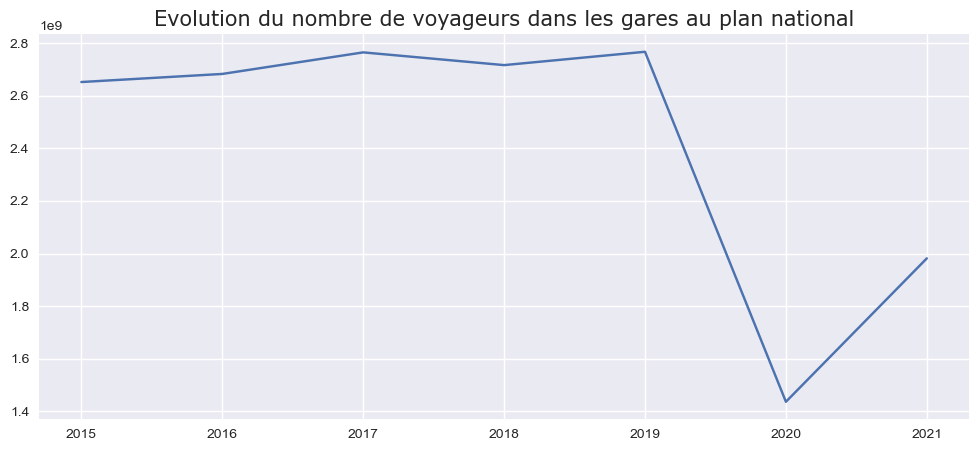

In [18]:
plt.figure(figsize = (12,5))
dataFreqV[["total_voyageurs_{}".format(an) for an in range(2015, 2022)]].iloc[-1].plot()
plt.xticks(ticks = range(7), labels=["20{}".format(an) for an in range(15,22)])
plt.title("Evolution du nombre de voyageurs dans les gares au plan national", fontsize  = 15, fontfamily = "verdana")

Auscultons l'évolution par région

In [20]:
dataFreqV["code_depart"] = dataFreqV["code_postal"].str[0:2] # Extraction du code desdépartements

In [21]:
# Importation de la liste des départements et régions associées
url_api_regions = "https://geo.api.gouv.fr/departements?fields=nom,region,zone"
regions = rq.get(url_api_regions)
regions = pd.json_normalize(regions.json())
regions.head()
regions.tail()
regions.shape

(101, 5)

In [22]:
regions.rename(columns={"code" : "code_depart"}, inplace=True)

In [23]:
dataFreqV = dataFreqV.merge(regions, how="left")

([<matplotlib.axis.XTick at 0x1636cb17e50>,
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021')])

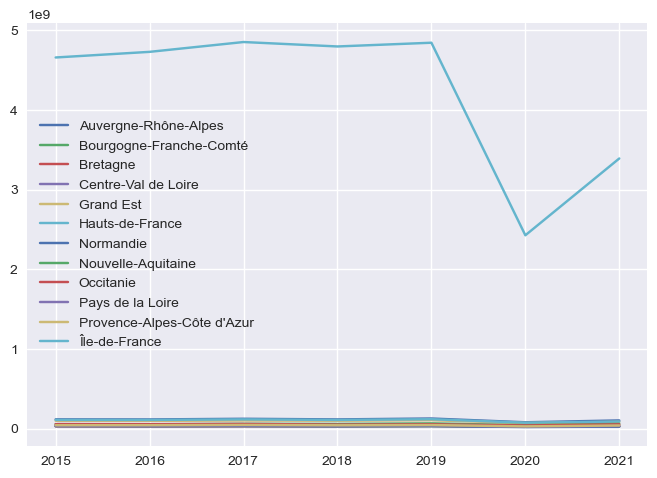

In [25]:
#fig = plt.figure().subplots_adjust()
dataFreqV[["total_voyageurs_{}".format(an) for an in range(2015, 2022)] + ["region.nom"]].groupby("region.nom").sum().T.plot()
plt.legend(title = "")
plt.xticks(ticks = range(7), labels=["20{}".format(an) for an in range(15,22)])

L'Ile-de-France possède des valeurs qui s'écartent significativement de celles des autres départements.
Pour cela, séparons l'Ile-De-France afin de mieux visualiser l'évolution du nombre de voyageurs dans chaque région.

([<matplotlib.axis.XTick at 0x1636cbe31f0>,
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021')])

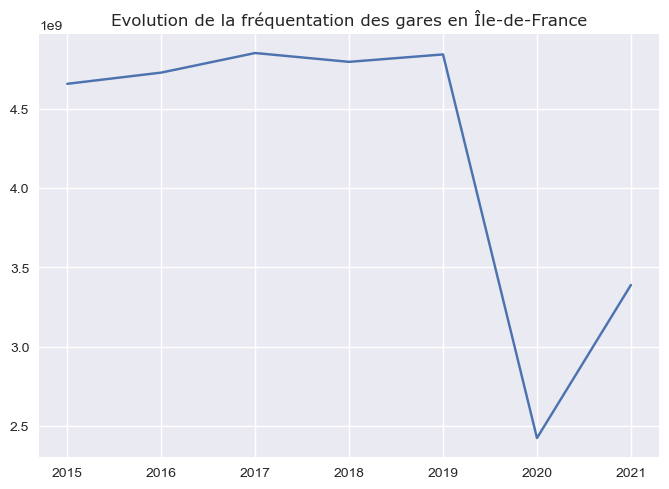

In [26]:
dataFreqV[["total_voyageurs_{}".format(an) for an in range(2015, 2022)] + ["region.nom"]].groupby("region.nom").sum().loc['Île-de-France'].plot()
plt.title("Evolution de la fréquentation des gares en Île-de-France", fontsize  = 12, fontfamily = "verdana")
plt.xticks(ticks = range(7), labels=["20{}".format(an) for an in range(15,22)])

On remarque la même tendance que l'évolution des chiffres au plan national

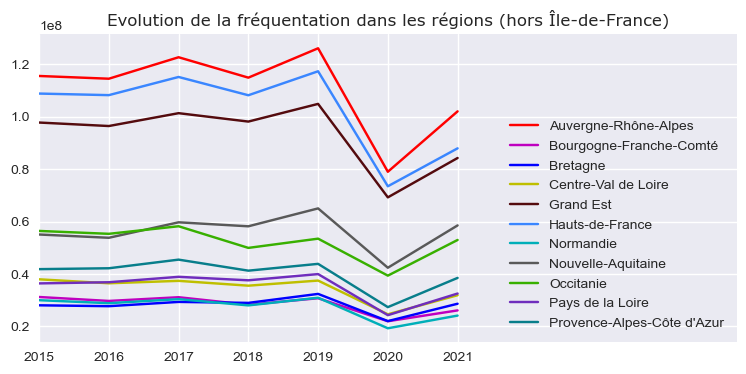

In [27]:
fig, ax = plt.subplots(figsize=(9, 4))
dataFreqV[["total_voyageurs_{}".format(an) for an in range(2015, 2022)] + ["region.nom"]].groupby("region.nom").sum().iloc[0:-1].T.plot(ax = ax, color = ['r', 'm', "b", "y", "#540b0e", "#3a86ff", "#00afb9", "#595959", "#38b000", "#6f2dbd", "#087e8b"])
plt.title("Evolution de la fréquentation dans les régions (hors Île-de-France)", fontsize  = 12, fontfamily = "verdana")
plt.xticks(ticks = range(7), labels=["20{}".format(an) for an in range(15,22)])
plt.xlim([0,10])
plt.legend(loc = "lower right")
plt.show()

Globalement, l'évolution du nombre de voyageurs a suivi la même tendance dans toutes les régions métropolitaines. 
Chaque région a maintenu son classement le long des sept (07) dernières années (hors 2022) hormis quelques fois où des régions ont interchangé leurs positions :
* la **Nouvelle-Aquitaine** est passée au dessus de l'**Occitanie** à partir l'année 2016
* la **Bretagne**, le **Bourgogne-Franche-Comté** et la **Normandie** occupant les trois dernières positions et s'échangeant mutuellement leurs places dans la hiérachie.

Nous allons maintenant réaliser des heatmaps afin de visualiser la densité des gares par aire géographique

In [45]:
import geoplot as gplt
import cartiflette
import geoplot.crs as gcrs

In [29]:
# Importation du fond de carte
from cartiflette.download import get_vectorfile_ign
france = get_vectorfile_ign(
  level = "REGION",
  field = "metropole",
  source = "COG",
  provider="opendatarchives"
  )

http://files.opendatarchives.fr/professionnels.ign.fr/adminexpress/ADMIN-EXPRESS-COG_3-1__SHP__FRA_L93_2022-04-15.7z
Data have been previously downloaded and are still available in C:\Users\guysa\AppData\Local\Temp/COG-2022


In [30]:
france.head()

,ID,NOM_M,NOM,INSEE_REG,geometry
0,REGION_FXX_0000000000001,ILE-DE-FRANCE,Île-de-France,11,"POLYGON ((689486.400 6885591.700, 689488.900 6..."
1,REGION_FXX_0000000000002,CENTRE-VAL DE LOIRE,Centre-Val de Loire,24,"POLYGON ((604790.400 6831645.800, 604797.700 6..."
2,REGION_FXX_0000000000003,BOURGOGNE-FRANCHE-COMTE,Bourgogne-Franche-Comté,27,"POLYGON ((880572.700 6730278.000, 880518.100 6..."
3,REGION_FXX_0000000000004,NORMANDIE,Normandie,28,"MULTIPOLYGON (((367887.800 6849529.900, 367898..."
4,REGION_FXX_0000000000005,HAUTS-DE-FRANCE,Hauts-de-France,32,"POLYGON ((686066.000 6888650.700, 685949.700 6..."


In [32]:
france.drop(france.loc[france["NOM"] == "Corse"].index, inplace = True) # Suppression de la Corse

In [33]:
france.rename(columns = {"INSEE_REG" : "region.code"}, inplace = True) # renommer INSEE_REG par region.code

Ajout de la localisation de chaque gare voyageurs à partir des données `reference-gares-voyageurs`

In [34]:
url_gares = "https://ressources.data.sncf.com/api/v2/catalog/datasets/referentiel-gares-voyageurs/exports" + "/json" + "?limit=-1"+ "&offset=0" + "&lang=fr" + "&timezone=Europe%2FParis"
dataGares = rq.get(url_gares)
dataGares = dataGares.json() 
dataGares = pd.json_normalize(dataGares)
dataGares = gpd.GeoDataFrame(dataGares, geometry = gpd.points_from_xy(dataGares["wgs_84.lon"], dataGares["wgs_84.lat"]), crs= 4326)
dataGares = dataGares.drop(columns={"wgs_84"})
dataGares.fillna(value= np.nan, inplace=True)
dataGaresV = dataGares[["code_gare", "uic_code", "dtfinval", "adresse_cp", "alias_libelle_noncontraint", "departement_numero", "gare_etrangere_on","wgs_84.lon", "wgs_84.lat", "geometry"]]

In [35]:
dataGaresV.head()

,code_gare,uic_code,dtfinval,adresse_cp,alias_libelle_noncontraint,departement_numero,gare_etrangere_on,wgs_84.lon,wgs_84.lat,geometry
0,00001,0087988717,NaN,93190,Lycée Henri Sellier,93,False,2.515040,48.916460,POINT (2.51504 48.91646)
1,00007,0087784876,NaN,66760,Bourg-Madame,66,False,1.948670,42.432407,POINT (1.94867 42.43241)
2,00013,0087784819,NaN,66120,Font-Romeu-Odeillo-Via,66,False,2.038392,42.491232,POINT (2.03839 42.49123)
3,00019,0087784751,NaN,66360,Thuès Carença,66,False,2.222728,42.522949,POINT (2.22273 42.52295)
4,00025,0087784686,NaN,66820,Villefranche - Vernet-les-Bains,66,False,2.370396,42.591998,POINT (2.37040 42.59200)


In [36]:
# renommer "code_uic_complet" de dataFreqV
dataFreqV.rename(columns={"code_uic_complet":"uic_code"}, inplace=True)

In [37]:
# reformater "uic_code" de dataGaresV
dataGaresV.uic_code = dataGaresV.uic_code.str[2:]

c:\Users\guysa\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [38]:
# Merge de dataFreqV et dataGaresV dans heatData
heatData = dataGaresV.merge(dataFreqV, how = "left")
heatData.head()

,code_gare,uic_code,dtfinval,adresse_cp,alias_libelle_noncontraint,departement_numero,gare_etrangere_on,wgs_84.lon,wgs_84.lat,geometry,...,diff_2017,diff_2018,diff_2019,diff_2020,diff_2021,code_depart,nom,zone,region.code,region.nom
0,00001,87988717,NaN,93190,Lycée Henri Sellier,93,False,2.515040,48.916460,POINT (2.51504 48.91646),...,0.0,0.0,0.0,0.0,0.0,93,Seine-Saint-Denis,metro,11,Île-de-France
1,00007,87784876,NaN,66760,Bourg-Madame,66,False,1.948670,42.432407,POINT (1.94867 42.43241),...,0.0,0.0,0.0,0.0,0.0,66,Pyrénées-Orientales,metro,76,Occitanie
2,00013,87784819,NaN,66120,Font-Romeu-Odeillo-Via,66,False,2.038392,42.491232,POINT (2.03839 42.49123),...,0.0,0.0,0.0,0.0,0.0,66,Pyrénées-Orientales,metro,76,Occitanie
3,00019,87784751,NaN,66360,Thuès Carença,66,False,2.222728,42.522949,POINT (2.22273 42.52295),...,0.0,0.0,0.0,0.0,0.0,66,Pyrénées-Orientales,metro,76,Occitanie
4,00025,87784686,NaN,66820,Villefranche - Vernet-les-Bains,66,False,2.370396,42.591998,POINT (2.37040 42.59200),...,37258.0,33291.0,34557.0,36261.0,57720.0,66,Pyrénées-Orientales,metro,76,Occitanie


In [39]:
#on s'assure de mettre les jeux de données à utiliser dans la géométrie WGS84
heatData = heatData.to_crs(4326)
france = france.to_crs(4326)

In [40]:
france.crs
heatData.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Retirons du jeu heatData, les gares dont la géométrie est absente.

In [41]:
heatData = heatData.drop(heatData[heatData.geometry.is_empty].index)

c:\Users\guysa\anaconda3\lib\site-packages\geoplot\geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
c:\Users\guysa\anaconda3\lib\site-packages\geoplot\geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
c:\Users\guysa\anaconda3\lib\site-packages\geoplot\geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
c:\Users\guysa\anaconda3\lib\site-packages\geoplot\geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
c:\Users\guysa\anaconda3\lib\site-packages\g

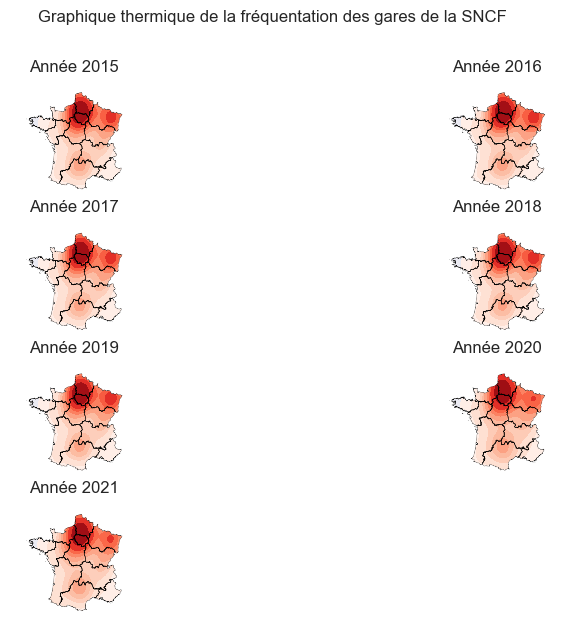

In [68]:
fig = plt.figure(figsize=(10,7))
fig.suptitle("Graphique thermique de la fréquentation des gares de la SNCF")
fig.tight_layout()

for an, i in zip(range(2015, 2022), range(1,8)) :
    proj = gcrs.AlbersEqualArea(central_latitude = 47.094, central_longitude= 2.3942)
    ax = plt.subplot(4,2,i, projection = proj)
    gplt.kdeplot(
        heatData,
        cmap = 'Reds',
        projection = proj,
        shade = True, 
        thresh = 0.05,
        clip = france.geometry,
        weights = heatData["total_voyageurs_{}".format(an)], # le nombre de voyageurs est le poids
        ax = ax
    )
    gplt.polyplot(france, zorder=1, ax=ax)
    ax.set_title("Année {}".format(an))


C'est globalement le même aspect. Le plus grand nombre ded voyageurs se concentrent au nord-est du pays